In [1]:
## importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv("/content/heart.csv")

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import StackingClassifier

In [6]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [7]:
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up


In [8]:
y.value_counts()

,count
HeartDisease,
1,508
0,410


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Create Column Transformer with 4 types of transformers
cat_features = X.select_dtypes(include="object").columns
num_features = X.select_dtypes(exclude="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
         ("OneHotEncoder", oh_transformer, cat_features),
          ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [14]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object'))])

In [15]:
## applying Trnsformation in training(fit_transform)
X_train=preprocessor.fit_transform(X_train)

In [16]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.245067,-0.708985,0.372803,1.842609,2.284353,-0.097061
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.886236,-0.166285,0.086146,-0.542709,1.652241,-0.836286
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.250993,0.919115,0.123134,1.842609,-0.441628,0.087745
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.779375,-0.166285,0.104640,-0.542709,0.229991,-0.836286
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.283314,-0.708985,-1.846478,1.842609,-1.271274,-0.836286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.603898,-0.708985,0.502261,-0.542709,-1.034232,-0.836286
730,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.924483,-0.708985,0.234098,-0.542709,0.150977,-0.836286
731,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.678439,-0.166285,0.493014,-0.542709,0.309005,0.457358
732,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.678439,1.027656,-1.846478,-0.542709,-0.718176,-0.836286


In [17]:
## apply tansformation on test(transform)
X_test=preprocessor.transform(X_test)

In [18]:
X_test

array([[ 0.        ,  1.        ,  0.        , ..., -0.5427086 ,
         1.69174843, -0.83628643],
       [ 1.        ,  0.        ,  1.        , ..., -0.5427086 ,
        -0.24409275, -0.83628643],
       [ 1.        ,  0.        ,  0.        , ...,  1.84260945,
        -0.56014845,  0.27255158],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  1.84260945,
        -0.79719023,  0.54976108],
       [ 1.        ,  1.        ,  0.        , ..., -0.5427086 ,
         1.37569273, -0.28186743],
       [ 1.        ,  0.        ,  0.        , ..., -0.5427086 ,
        -0.56014845,  0.08774524]])

In [20]:
rf = RandomForestClassifier(oob_score=True)
rf.fit(X_train, y_train)
rf.score(X_train, y_train)


1.0

In [21]:
rf.oob_score_

0.8623978201634878

In [23]:
y_pred = rf.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1])

In [24]:
accuracy_score(y_test, y_pred)

0.8695652173913043

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification

In [26]:
X,y = make_classification(n_samples=5,n_features=2,n_informative=2,n_redundant=0,random_state=0)

In [27]:
X

array([[ 0.96399434, -0.12399406],
       [ 1.05699092,  0.69448021],
       [-0.55744457,  0.08369352],
       [-1.19224399, -1.66447018],
       [-0.3874711 ,  1.38366234]])

In [28]:
y

array([0, 1, 0, 1, 0])

In [29]:
DTC = DecisionTreeClassifier()
DTC.fit(X,y)

DecisionTreeClassifier()

In [30]:
from sklearn.tree import plot_tree

[Text(0.4, 0.8333333333333334, 'x[1] <= -0.894\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[0] <= 1.01\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

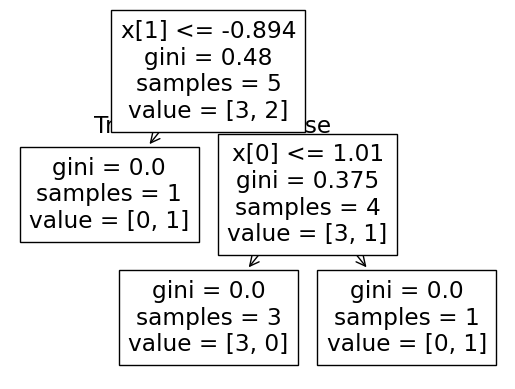

In [31]:
plot_tree(DTC)

In [32]:
DTC.feature_importances_

array([0.625, 0.375])

In [33]:
RFC = RandomForestClassifier()
RFC.fit(X,y)

RandomForestClassifier()

In [34]:
RFC.feature_importances_

array([0.56534091, 0.43465909])

In [35]:
RFC.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1873516427)

In [36]:
RFC.estimators_[1]

DecisionTreeClassifier(max_features='sqrt', random_state=635741014)

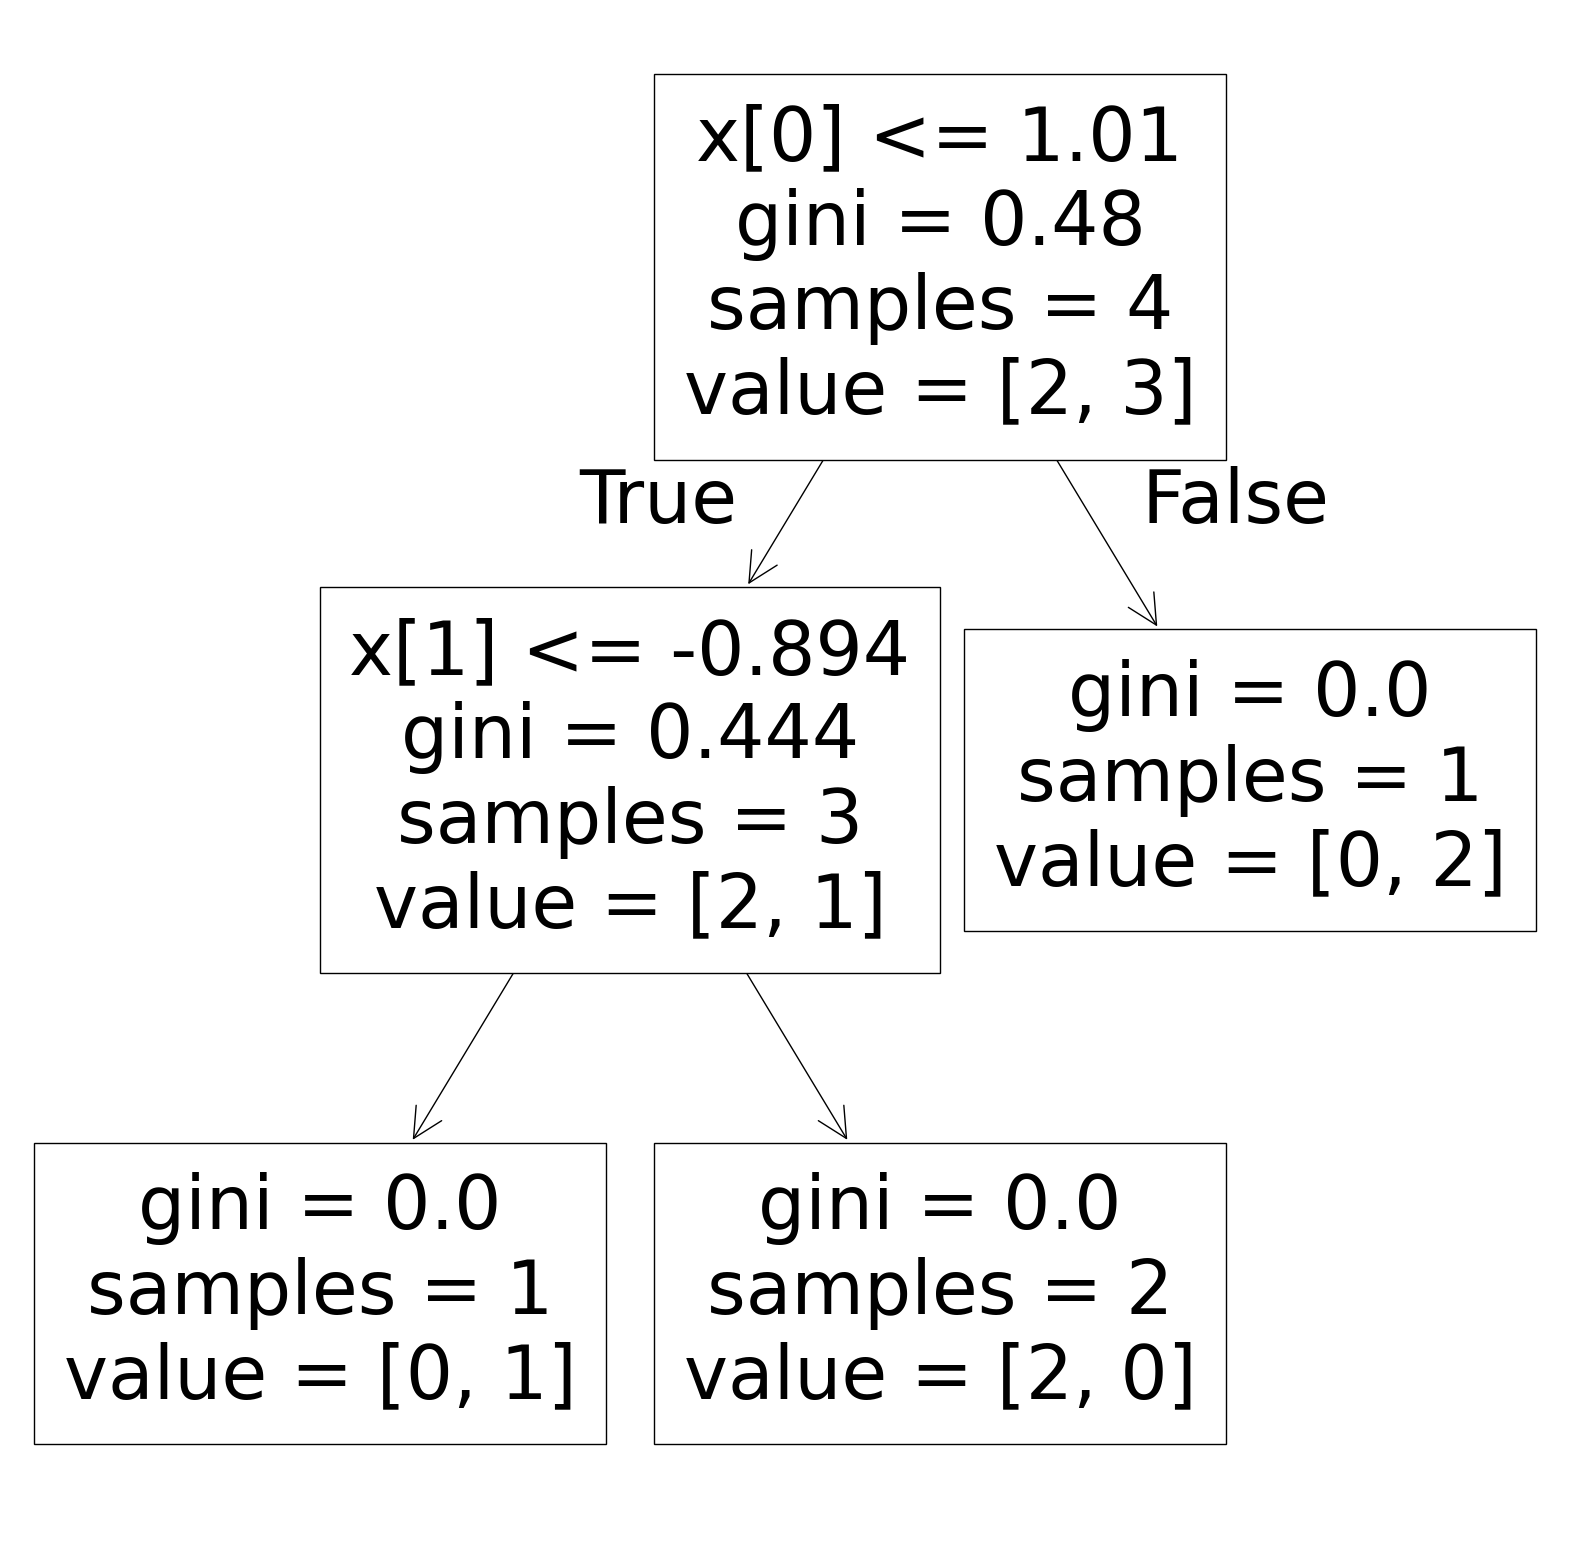

In [38]:
plt.figure(figsize=(20,20))
for i in range(10):
  plot_tree(RFC.estimators_[i])